In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [2]:
get_ipython().magic('matplotlib inline')
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [39]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


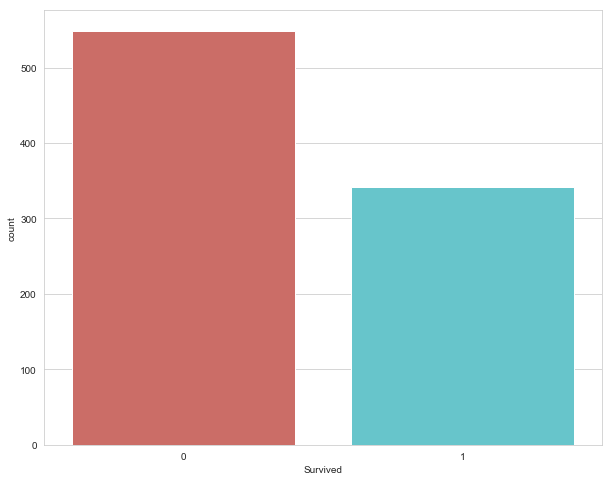

In [4]:
sb.countplot(x='Survived',data=titanic, palette='hls')

In [ ]:
titanic.isnull().sum()

In [ ]:
titanic.info()

In [47]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


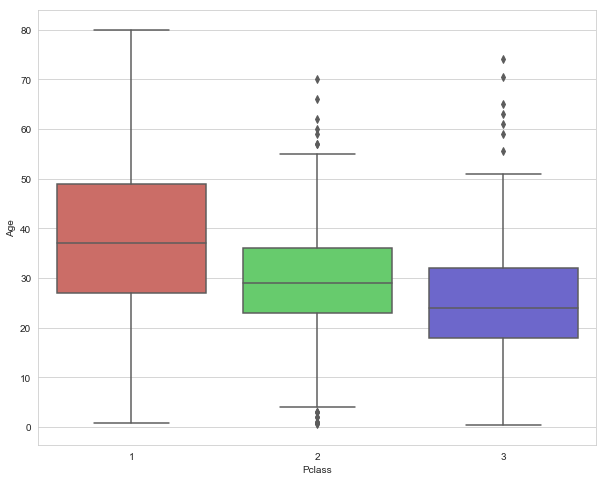

In [48]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

In [49]:
titanic_data.groupby('Pclass').median()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1,37.0,0,0,60.2875
2,0,29.0,0,0,14.2500
3,0,24.0,0,0,8.0500


In [50]:
titanic_data.head()


# Speaking roughly, we could say that the younger a passenger is, the more likely it is for them to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.
# 
# So let's write a function that finds each null value in the Age variable, and for each null, checks the value of the Pclass and assigns an age value according to the average age of passengers in that class.

# In[ ]:

def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [51]:

titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()


# There are 2 null values in the embarked variable. We can drop those 2 records without loosing too much important information from our dataset, so we will do that.

# In[ ]:

titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()


# In[ ]:

embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()


# In[ ]:

titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


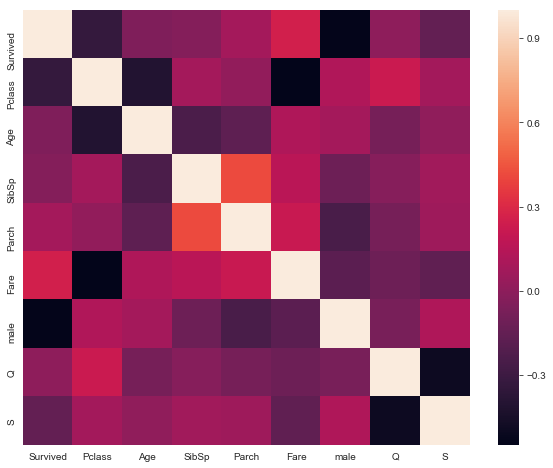

In [53]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()


# In[ ]:

titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()


# Now we have a dataset with all the variables in the correct format!
# 
# ### Checking for independence between features

# In[ ]:

sb.heatmap(titanic_dmy.corr())  

In [54]:
titanic_dmy.drop(['Fare', 'Pclass' ],axis=1,inplace=True)
titanic_dmy.head()


# ### Checking that your dataset size is sufficient
# We have 6 predictive features that remain. The rule of thumb is 50 records per feature... so we need to have at least 300 records in this dataset. Let's check again.

# In[ ]:

titanic_dmy.info()


# Ok, we have 889 records so we are fine.

# In[ ]:

X = titanic_dmy.iloc[:,[1,2,3,4,5,6]].values
y = titanic_dmy.iloc[:,0].values


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


# ### Deploying and evaluating the model

In [59]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


# In[ ]:

y_pred = LogReg.predict(X_test)


C:\Users\v-rakart\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[137,  27],
       [ 34,  69]], dtype=int64)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       164
           1       0.72      0.67      0.69       103

   micro avg       0.77      0.77      0.77       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.77      0.77      0.77       267



In [82]:
from sklearn import metrics
y_pred = LogReg.predict_proba(X_test)
y_pred_df=pd.DataFrame(y_pred)
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1

,1
0,0.736372
1,0.829174
2,0.162535
3,0.720997
4,0.152497
5,0.137938
6,0.738466
7,0.680581
8,0.153899
9,0.192700


In [28]:
from sklearn.metrics import roc_curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

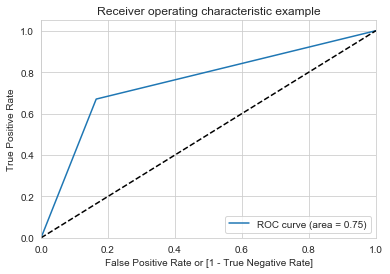

(array([0.        , 0.16463415, 1.        ]),
 array([0.        , 0.66990291, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [29]:
draw_roc(y_test, y_pred)